Cross validation and bootstrap.

Training error vs test error
Training error is the error we get from applying the model to the data we used to build the model.
Test error is the error we get from applying the model to data that has not been used to build the model.

CP statistic AIC, BIC, use to estimate test error from training error.

Cross-validation, hold out some part of data from training set to use as test data.  Measured by MSE (mean squared error) for quantitative responses and misclassification error rate for qualitative responses (classifications)

CV is used to pick polynomial of the model, not good at telling us the level of the error, wide range.  Highly variable because we're splitting into 2 parts, throwing away half the data in training.

Generally more observations lead to lower error rate.

5.1.2 LOOCV (Leave One Out Cross Validation)
make multiple training sets, each with one value less in it.  Train and test each successive subset and average the MSE across all the permutations of training/test sets.

Advantage is less bias in the result, and no randomness.  Disadvantage is that it can be expensive to implement

5.1.3 k-fold cross validation
Same as LOOCV, but you take $n/k$ observations as test, with the remainder as training.  You take successive subsets and average the MSE across the permutations of training/test sets. LOOCV is basically k-fold with k set to n.  However, one usually uses k=5 or k=10, mostly for computational advantage.

5.1.4 bias-variance trade-off for k-fold CV vs LOOCV

5.1.5 CV on classification problems
Instead of using MSE, calculated avg # of misclassified observations per subset.

5.2 the bootstrap
sampling is performed with replacement

### Lab



In [ ]:
library(ISLR)
attach(Auto)

[1] 26.14142

[1] 19.82259

[1] 19.78252

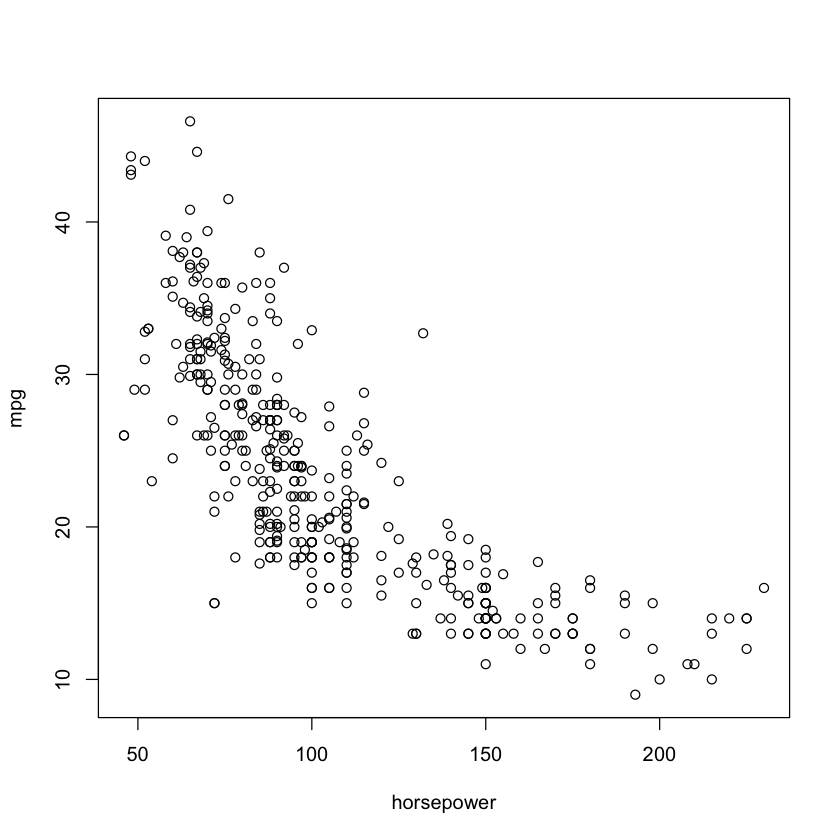

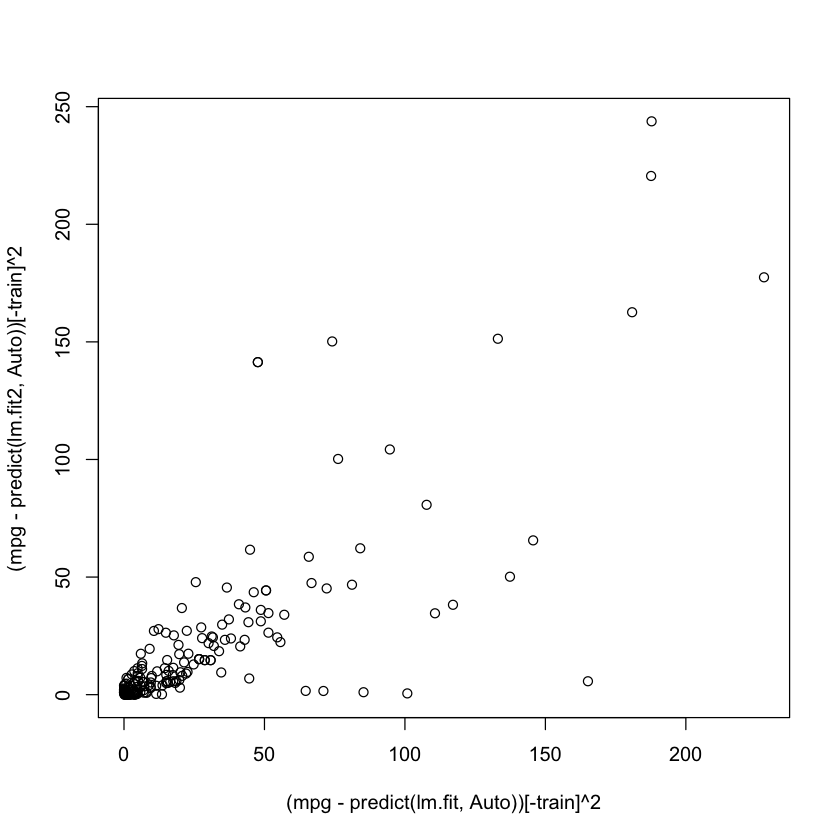

In [20]:
set.seed(1)
train=sample(392,196)
lm.fit=lm(mpg~horsepower, data=Auto, subset=train)
mean((mpg - predict(lm.fit, Auto))[-train]^2) # MSE

lm.fit2=lm(mpg~poly(horsepower, 2),data=Auto,subset=train) 
# MSE quadratic regression, different from QDA?
mean((mpg-predict(lm.fit2,Auto))[-train]^2)

# MSE for cubic regression
lm.fit3=lm(mpg~poly(horsepower, 3),data=Auto,subset=train)
mean((mpg-predict(lm.fit3,Auto))[-train]^2)

plot(mpg~horsepower)
plot((mpg - predict(lm.fit, Auto))[-train]^2, (mpg-predict(lm.fit2,Auto))[-train]^2)


###### 1. 
Using basic statistical properties of the variance, as well as single-variable calculus, derive (5.6). In other words, prove that $α$ given by (5.6) does indeed minimize $Var(αX + (1 − α)Y )$.

(5.6)
$α= \frac{\sigma_Y^2 − σ_{XY}}{σ_X^2 + σ_Y^2 − 2σ_{XY}}$

where $σ_X^2 = Var(X)$, $σ_Y^2 = Var(Y)$, and $σ_{XY} = Cov(X, Y)$.

$\sigma^2 = Var(X)$

$Var(aX+bY) = a^2Var(X) + b^2Var(Y) + 2abCov(XY)$

### 2. 
We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of n observations.

#### (a) What is the probability that the first bootstrap observation is not the jth observation from the original sample? Justify your answer.

**A**

$1 - (\frac{1}{n})$ 

Because we sample with replacement, each sample is independent from the others.

#### (b) What is the probability that the second bootstrap observation is not the jth observation from the original sample?

$1 - (\frac{1}{n})$

Same as A because we sample with replacement


#### (c) Argue that the probability that the jth observation is not in the bootstrap sample is $(1 − 1/n)^n$.

$(1 - (1/n))(1-1/n)..n times = (1-1/n)^n$

#### (d) When n = 5, what is the probability that the jth observation is in the bootstrap sample?

In [22]:
1 - (1-1/5)^5

[1] 0.67232

#### (e) When n = 100, what is the probability that the jth observation is in the bootstrap sample?

In [23]:
1 - (1 - 1/100)^100

[1] 0.6339677

#### (f) When n = 10, 000, what is the probability that the jth observa- tion is in the bootstrap sample?

In [25]:
1 - (1 - 1/10000)^10000

[1] 0.632139

#### (g) Create a plot that displays, for each integer value of n from 1 to 100,000, the probability that the jth observation is in the bootstrap sample. Comment on what you observe.

#### (h) We will now investigate numerically the probability that a boot- strap sample of size n = 100 contains the jth observation. Here j = 4. We repeatedly create bootstrap samples, and each time we record whether or not the fourth observation is contained in the bootstrap sample.

    > store=rep(NA, 10000) 
    > for(i in 1:10000){
        store[i]=sum(sample(1:100, rep=TRUE)==4)>0 }
    > mean(store)
    
Comment on the results obtained.

### 3. We now review k-fold cross-validation.
(a) Explain how k-fold cross-validation is implemented.